### Student Information
Name: 李子昀

Student ID: 108065502

GitHub ID: 30849777(user name is grace6029)

---

### Instructions

1. First: do the **take home** exercises in the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/EvaArevalo/DM19-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 29th 11:59 pm, Tuesday)__. 

# First Part: Take Home Exercises

In [2]:
### Begin Assignment Here

In [3]:
# necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

In [4]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [5]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

In [6]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [7]:
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### >>> Exercise 2:

Experiment with other querying techniques using pandas dataframes. Refer to their documentation for more information.

In [33]:
#use sort_index()
X['text'].sort_index()[:10]

0    From: sd345@city.ac.uk (Michael Collier) Subje...
1    From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2    From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
3    From: s0612596@let.rug.nl (M.M. Zwart) Subject...
4    From: stanly@grok11.columbiasc.ncr.com (stanly...
5    From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...
6    From: jodfishe@silver.ucs.indiana.edu (joseph ...
7    From: aldridge@netcom.com (Jacquelin Aldridge)...
8    From: geb@cs.pitt.edu (Gordon Banks) Subject: ...
9    From: libman@hsc.usc.edu (Marlena Libman) Subj...
Name: text, dtype: object

In [32]:
#use sort_values(). It will sort based on the order of the first alphabet rather than index.
X.sort_values(by = 'text')[:10]

,text,category,category_name
1598,cs.utexas.edu!geraldo.cc.utexas.edu!portal.au...,0,alt.atheism
1595,cs.utexas.edu!geraldo.cc.utexas.edu!portal.au...,0,alt.atheism
1144,cs.utexas.edu!uunet!olivea!sgigate!sgiblab!ad...,0,alt.atheism
1151,cs.utexas.edu!uunet!olivea!sgigate!sgiblab!ad...,0,alt.atheism
1506,howland.reston.ans.net!europa.eng.gtefsd.com!...,0,alt.atheism
242,howland.reston.ans.net!europa.eng.gtefsd.com!...,0,alt.atheism
1426,sgiblab!adagio.panasonic.com!nntp-server.calt...,0,alt.atheism
1329,uunet!olivea!sgigate!sgiblab!adagio.panasonic...,0,alt.atheism
1096,wupost!uunet!olivea!sgigate!sgi!fido!solntze....,0,alt.atheism
1156,wupost!uunet!olivea!sgigate!sgi!fido!solntze....,0,alt.atheism


### >>> Exercise 5:
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.
HintHint  : why .isnull() didn't work?

In [10]:
# Answer here
'''
I observed that isnull() function worked for index 0, 1, and 4, while it doesn't work for index 2, 3, and 5. It's because that
index 2, 3, and 5 were actually stored some string value. That is, 'NaN', 'None', and ''!!! Therefore, isnull() function wouldn't
work for them.
'''

"\nI observed that isnull() function worked for index 0, 1, and 4, while it doesn't work for index 2, 3, and 5. It's because that\nindex 2, 3, and 5 were actually stored some string value. That is, 'NaN', 'None', and ''!!! Therefore, isnull() function wouldn't\nwork for them.\n"

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [19]:
X[:10]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med


In [20]:
X_sample = X.sample(n=1000) #random state

In [24]:
X_sample[:10]

,text,category,category_name
971,From: mathew <mathew@mantis.co.uk> Subject: Al...,0,alt.atheism
171,From: mdw33310@uxa.cso.uiuc.edu (Michael D. Wa...,3,soc.religion.christian
77,From: dmp1@ukc.ac.uk (D.M.Procida) Subject: Re...,2,sci.med
2142,From: atterlep@vela.acs.oakland.edu (Cardinal ...,3,soc.religion.christian
2196,From: kellyb@ccsua.ctstateu.edu Subject: Re: B...,0,alt.atheism
1282,From: Christopher.S.Weinberger@williams.edu (G...,3,soc.religion.christian
48,From: nfotis@ntua.gr (Nick C. Fotis) Subject: ...,1,comp.graphics
1064,From: sgoldste@aludra.usc.edu (Fogbound Child)...,1,comp.graphics
534,From: gt7122b@prism.gatech.edu (boundary) Subj...,3,soc.religion.christian
1216,From: neideck@nestvx.enet.dec.com (Burkhard Ne...,1,comp.graphics


In [40]:
X.loc[171]
#使用dataframe loc 來查看指定row的內容
# iloc   基於行索引和列索引（index，columns） 都是從 0 開始
#loc     基於行標籤和列標籤（x_label、y_label）進行索引

text             From: mdw33310@uxa.cso.uiuc.edu (Michael D. Wa...
category                                                         3
category_name                               soc.religion.christian
Name: 171, dtype: object

In [41]:
X_sample.loc[171]

text             From: mdw33310@uxa.cso.uiuc.edu (Michael D. Wa...
category                                                         3
category_name                               soc.religion.christian
Name: 171, dtype: object

In [25]:
X[:10]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med


In [26]:
len(X)

2257

In [ ]:
'''
I notice that after we sample some data for X dataframe
'''

### >>> Exercise 8
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an exercise. Below we show you an snapshot of the type of chart we are looking for.

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
categories

['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

Text(0,0.5,'category_name')

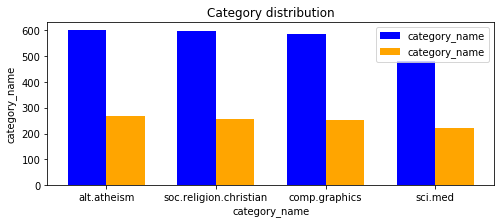

In [79]:
x_origin = X.category_name.value_counts()
x_sample = X_sample.category_name.value_counts()

#ylim set the range of y axis
plt.figure(figsize=(8,3))
plt.bar(categories, x_origin, color='blue',label = "category_name",align = "edge",width = -0.35)
plt.bar(categories, x_sample, color='orange',label = "category_name",align = "edge",width = 0.35)
#指定label前需要加上legend()
plt.legend()
plt.title('Category distribution')
plt.xlabel("category_name")
plt.ylabel("category_name")
#X.category_name.value_counts().plot(kind = 'bar', ylim = [0, upper_bound], 
#                                           rot = 0, fontsize = 12, figsize = (8,3))
#X_sample.category_name.value_counts().plot(kind = 'bar',
#                                           ylim = [0, upper_bound],
#                                           rot = 0, fontsize = 12, figsize = (8,3))

### >>> Exercise 10
We said that the 1 at the beginning of the fifth record represents the 00 term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [70]:
import nltk

In [71]:
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [72]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

In [73]:
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [111]:
import numpy as np
print("The first 37 words in document-term matrix are: ")
print(count_vect.get_feature_names()[:38])
for term_array in X_counts[0:5, 0:100].toarray():
    print("term_array is")
    print(term_array)
    list_1 = np.where(term_array==1)
    #print("Tuple of arrays returned: ")
    #print(list_1)
    #print("Elements with value 1 exists at following indices:")
    #print(list_1[0])
    
    if list_1[0]!=[]:
        print("The word for 1 are:")
        for index in list_1[0]:
            #print(index)
            print(count_vect.get_feature_names()[index])

The first 37 words in document-term matrix are: 
['00', '000', '0000', '0000001200', '000005102000', '0001', '000100255pixel', '00014', '000406', '0007', '000usd', '0010', '001004', '0010580b', '001125', '001200201pixel', '0014', '001642', '00196', '002', '0028', '003258u19250', '0033', '0038', '0039', '004021809', '004158', '004627', '0049', '00500', '005148', '00630', '008561', '0094', '00am', '00index', '00pm', '01']
term_array is
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
term_array is
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
term_array is
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  del sys.path[0]


### >>> Exercise 11
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of 1 in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [156]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()]

In [157]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)]

In [158]:
plot_z = X_counts.toarray()

In [120]:
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

In [119]:
plot_z[:,[0,10]]

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0]], dtype=int64)

In [122]:
len(X_counts.toarray())

2257

In [123]:
len(count_vect.get_feature_names())

35788

In [147]:
#把沒有任何一篇document出現的字詞去掉
for i in range(len(count_vect.get_feature_names()[0:20])):
    #print(plot_z[:,[i]])
    print("index:"+str(i))
    print(np.all(plot_z[:,[i]]==0))
    if np.all(plot_z[:,[i]]==0):
        print("all zero!")
        plot_z = np.delete(plot_z[:,[i]],0,axis=1)
        print(plot_z.shape)

index:0
False
index:1
True
all zero!
(20, 0)
index:2


IndexError: index 2 is out of bounds for axis 1 with size 0

In [141]:
plot_z.shape

(20, 20)

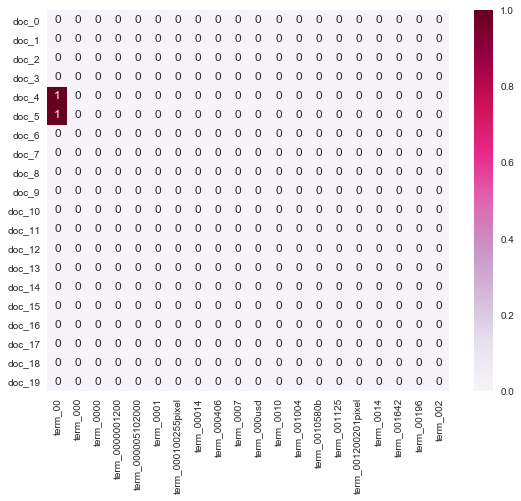

In [137]:
import seaborn as sns


df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [152]:
import matplotlib.pylab as plt
import scipy.sparse as sparse

Text(0,0.5,'appears or not')

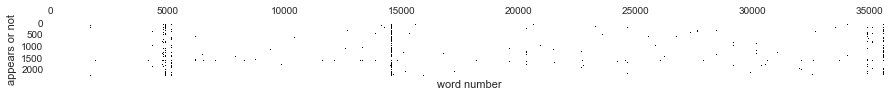

In [185]:
plt.figure(figsize=(15,8))
plt.spy(plot_z)
plt.xlabel("word number")
plt.ylabel("appears or not")

In [148]:
'''
Since heat map will create a huge chart with a lot of zero
, I think we can use 2-D plot to show how sparse the values are.
So, I will use matplotlib's Spy function, which works with sparse matrix.

'''

"\nSince the matrix is sparse, I think we can delete some columns of document-term matrix. We sample part of matrix and check each column. If a column\ncontains all zero, then we will delete that column to reduce the size of matrix since the word doesn't exist in any document.\n"

### >>> Exercise 12
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

HintHint : you can refer to Axes3D in the documentation.

In [190]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [187]:
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())

In [188]:
X_reduced.shape

(2257, 2)

C:\ProgramData\Anaconda3\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py:120: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  self.axesPatch.set_linewidth(0)
C:\ProgramData\Anaconda3\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py:2343: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  cstr = cbook.is_string_like(c) or cbook.is_sequence_of_strings(c)
C:\ProgramData\Anaconda3\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py:247: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  self.axesPatch.draw(renderer)


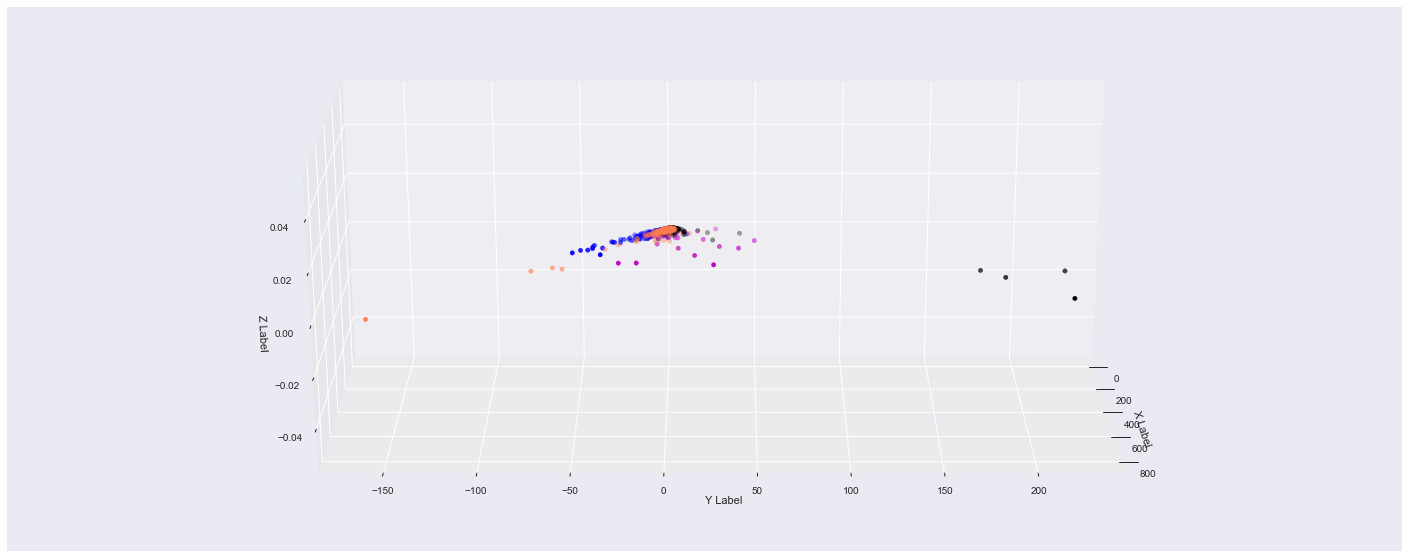

In [202]:
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(111,projection='3d')
col = ['coral', 'blue', 'black', 'm']
for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    
    ax.scatter(xs, ys,zs=0 ,c = c, marker='o')
    ax.set_xlabel('\nX Label')
    ax.set_ylabel('\nY Label')
    ax.set_zlabel('\nZ Label')
ax.view_init(20,0)
plt.show()

## Second Part

## Third Part

## Forth Part